In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.losses import * 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
# exactly the same as 019
class TimeSeries():
    def __init__(self,x_min, x_max, num_points):
        self._x_min = x_min
        self._x_max = x_max
        self._interval = (x_max - x_min)/num_points
        self._x = np.linspace(self._x_min, self._x_max, num_points)
        self._y = np.sin(self._x)
        
    def next_batch(self, batch_size, steps):
        x_start = np.random.rand(batch_size,1)*(self._x_max - self._x_min - steps * self._interval) + self._x_min 
        x_batch = x_start + np.arange(0, steps+1) * self._interval
        y_batch = np.sin(x_batch)
        return x_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,:-1].reshape(-1, steps, 1)
    
ts = TimeSeries(0,20,1000)

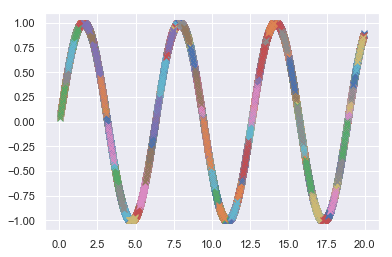

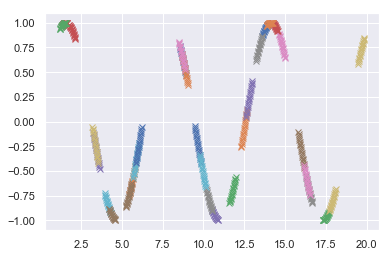

In [3]:
# prepare train/test data
epochs = 20

x_train, y_train = ts.next_batch(32,20)

for i in range(epochs-1):
    x,y = ts.next_batch(32,20)
    x_train = np.vstack((x_train,x))
    y_train = np.vstack((y_train,y))
    
x_test,y_test = ts.next_batch(32,20)

# plot
for x,y in zip(x_train, y_train):
    plt.plot(x,y,"x")
        
plt.figure()
for x,y in zip(x_test, y_test):
    plt.plot(x,y,"x")

In [4]:
# build model
model = Sequential([
    Bidirectional(
        LSTM(100, return_sequences=True),
        input_shape=(20,1)),
    TimeDistributed(Dense(1))
])

model.compile('adam', loss=tf.keras.losses.MeanSquaredError())

for i, layer in enumerate(model.layers):
    print('layer', str(i), layer.input_shape, layer.output_shape)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
layer 0 (None, 20, 1) (None, 20, 200)
layer 1 (None, 20, 200) (None, 20, 1)


In [5]:
# train
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(x_test, y_test))

Train on 640 samples, validate on 32 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
640/640 [==============================] - 2s 3ms/sample - loss: 0.5749 - val_loss: 0.5370
Epoch 2/20
640/640 [==============================] - 0s 667us/sample - loss: 0.4949 - val_loss: 0.4623
Epoch 3/20
640/640 [==============================] - 0s 691us/sample - loss: 0.4551 - val_loss: 0.4290
Epoch 4/20
640/640 [==============================] - 0s 715us/sample - loss: 0.4189 - val_loss: 0.3754
Epoch 5/20
640/640 [==============================] - 0s 714us/sample - loss: 0.3758 - val_loss: 0.3455
Epoch 6/20
640/640 [==============================] - 0s 638us/sample - loss: 0.3394 - val_loss: 0.3366
Epoch 7/20
640/640 [==============================] - 0s 655us/sample - loss: 0.3342 - val_loss: 0.3488
Epoch 8/20
640/640 [==============================] - 0s 694us/sample - loss: 0.3134 - val_loss: 0.3388
Epoch 9/20
640/640 [==============================] - 0s 659us/sample - loss:

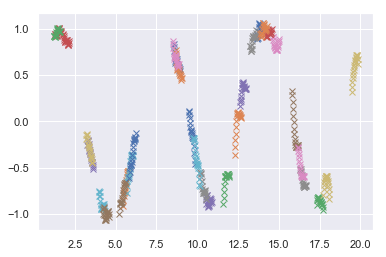

In [6]:
y_pred = model.predict(x_test)
for x,y in zip(x_test, y_pred):
    plt.plot(x,y,"x")